In [47]:
import pandas as pd
import numpy as np
import csv as csv
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [22]:
# Data cleanup
# TRAIN DATA
os.chdir(os.path.expanduser("~/Dropbox/Projects/data/kaggle/house_prices/"))
train = pd.read_csv('train.csv', header=0)        # Load the train file into a dataframe
test = pd.read_csv('test.csv', header=0)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
con_all = train.select_dtypes(include=['float64', 'int64']).columns.values
outcome = np.array(['SalePrice', 'Id'])
con = np.setdiff1d(con_all, outcome)
con

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'], dtype=object)

In [24]:
cat = train.select_dtypes(include=['object']).columns.values
cat

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'], dtype=object)

In [8]:
for v in cat:
    print v
    print train[v].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17


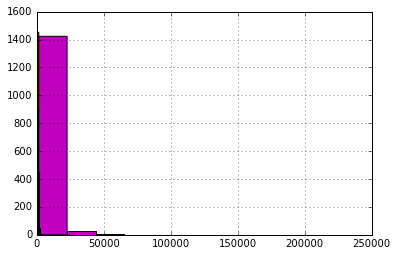

In [45]:
for c in con:
    train[c].hist()

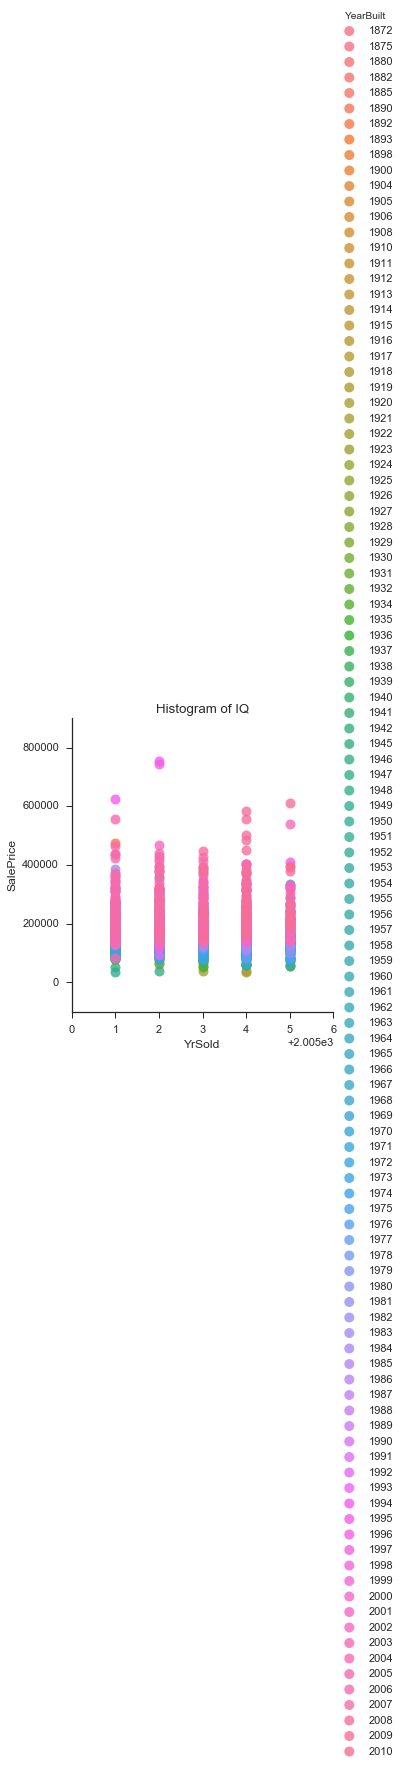

In [50]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('YrSold', 'SalePrice', 
           data=train, 
           fit_reg=False, 
#            dropna=True,
           hue="YearBuilt",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Histogram of IQ')
plt.xlabel('YrSold')
plt.ylabel('SalePrice')

In [25]:
le = LabelEncoder()
for v in cat:
    le.fit(train[v].append(test[v], ignore_index=True))
#     print list(le.classes_)
    train[v] = le.transform(train[v])
    test[v] = le.transform(test[v])
# train.head()

In [26]:
enc = OneHotEncoder()

enc.fit(train[cat].append(test[cat], ignore_index=True))
train_cat = enc.transform(train[cat]).toarray()
test_cat = enc.transform(test[cat]).toarray()

In [27]:
train_con = train[con]
test_con = test[con]
# train_con

In [28]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(train_con)
train_con = imp.transform(train_con) 
test_con = imp.transform(test_con) 

In [29]:
X_train = np.concatenate((train_cat, train_con), axis=1)
X_test = np.concatenate((test_cat, test_con), axis=1)
Y_train = train.SalePrice

In [30]:
ids = test['Id'].values

In [37]:
from sklearn.ensemble import RandomForestRegressor

print 'Training...'
forest = RandomForestRegressor(max_depth=30, random_state=2).fit(X_train, Y_train)

print 'Predicting...'
output = forest.predict(X_test)

predictions_file = open("submissions/forest0.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["Id","SalePrice"])
open_file_object.writerows(zip(ids, output))
predictions_file.close()
print 'Done.'

Training...
Predicting...
Done.


In [38]:
from sklearn.linear_model import LassoCV

print 'Training...'
lasso = LassoCV().fit(X_train, Y_train)

print 'Predicting...'
output = lasso.predict(X_test)

predictions_file = open("submissions/lasso0.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["Id","SalePrice"])
open_file_object.writerows(zip(ids, output))
predictions_file.close()
print 'Done.'

Training...
Predicting...
Done.


In [39]:
from sklearn.linear_model import RidgeCV

print 'Training...'
ridge = RidgeCV(alphas=[0.1, 0.5, 1.0, 3.0]).fit(X_train, Y_train)

print 'Predicting...'
output = ridge.predict(X_test)

predictions_file = open("submissions/ridge0.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["Id","SalePrice"])
open_file_object.writerows(zip(ids, output))
predictions_file.close()
print 'Done.'

Training...
Predicting...
Done.


In [35]:
train.shape

(1460, 81)

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# use a full grid over all parameters
param_grid = {'learning_rate': [0.08, 0.1, 0.12], 
              'max_depth': [1, 2, 3, 4], 
              'loss': ['ls', 'lad', 'huber']
             }

est = GradientBoostingRegressor(n_estimators=200, random_state=0)
# run grid search
grid_search = GridSearchCV(est, param_grid=param_grid).fit(X_train, Y_train)

print 'Predicting...'
output = grid_search.predict(X_test)

predictions_file = open("submissions/grgbm0.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["Id","SalePrice"])
open_file_object.writerows(zip(ids, output))
predictions_file.close()
print 'Done.'

Predicting...
Done.


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# use a full grid over all parameters
param_grid = {'learning_rate': [0.05, 0.08, 0.1, 0.12, 0.2], 
              'max_depth': [1, 2, 3, 4, 5], 
              'loss': ['ls', 'lad', 'huber'],
              'n_estimators': [100, 200, 400], 
              'random_state': [0, 3, 8]
             }

est = GradientBoostingRegressor()
# run grid search
grid_search = GridSearchCV(est, param_grid=param_grid).fit(X_train, Y_train)

print 'Predicting...'
output = grid_search.predict(X_test)

predictions_file = open("submissions/grgbm1.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["Id","SalePrice"])
open_file_object.writerows(zip(ids, output))
predictions_file.close()
print 'Done.'

Predicting...
Done.


In [41]:
from sklearn.ensemble import GradientBoostingRegressor

print 'Training...'
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, 
                                            max_depth=1, random_state=0, loss='ls').fit(X_train, Y_train)
print 'Predicting...'
output = est.predict(X_test)

predictions_file = open("submissions/gbm0.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["Id","SalePrice"])
open_file_object.writerows(zip(ids, output))
predictions_file.close()
print 'Done.'

Training...
Predicting...
Done.
